**Data visulization and prediction of production of crops**

**Importing libraries and dataset**

In [20]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn import model_selection
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR



crops_data = pd.read_csv("../input/apy.csv")



**Cleaning the dataset**

In [21]:
crops_data['Season'] = crops_data['Season'].str.rstrip()
crops_data['Crop_Year']=crops_data['Crop_Year'].astype(str)

**VISUALIZATION**

**Visualization of area and production of a crop for all over india**

             Production         Area
Crop_Year                           
1997       6.584850e+07  30706467.00
1998       7.876122e+07  38716952.00
1999       7.791707e+07  37058642.00
2000       8.309270e+07  43190618.00
2001       9.005787e+07  42745829.00
2002       7.145340e+07  40795160.29
2003       8.783597e+07  43181631.06
2004       8.417252e+07  42664665.23
2005       8.958719e+07  43519563.58
2006       9.167629e+07  43266797.59
2007       9.206481e+07  42026154.31
2008       9.526127e+07  43597987.00
2009       8.735634e+07  40583697.00
2010       9.517621e+07  41766900.50
2011       1.020939e+08  42011893.74
2012       1.003305e+08  47765615.00
2013       1.028728e+08  40485966.00
2014       1.040182e+08  39088073.00
2015       5.893687e+06   3952669.00
Bar plot of the above data
Line plot of the above data


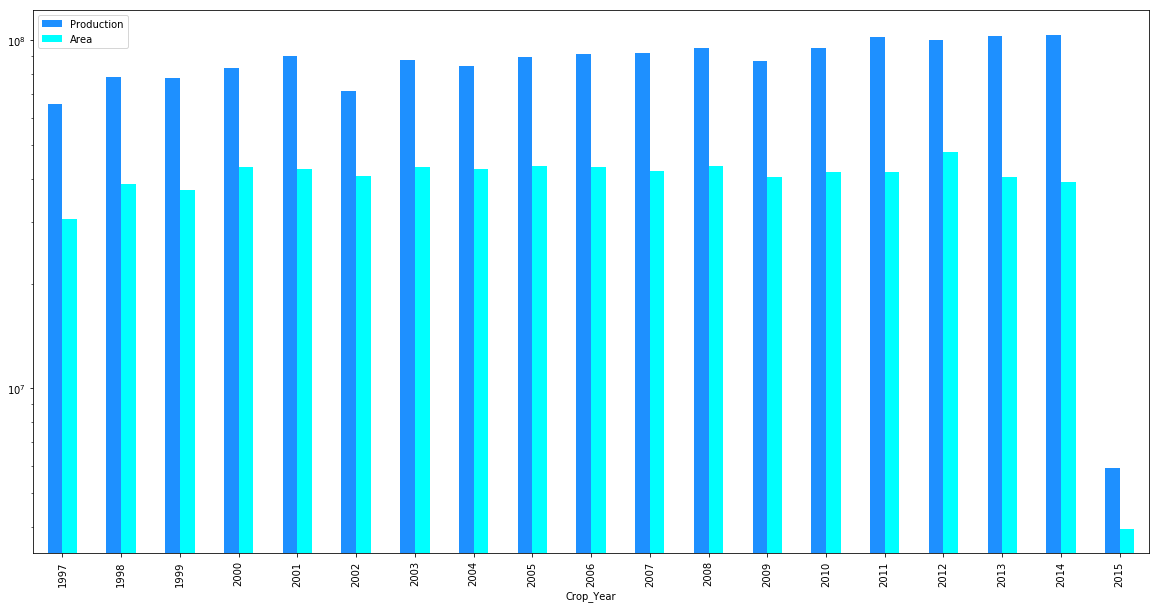

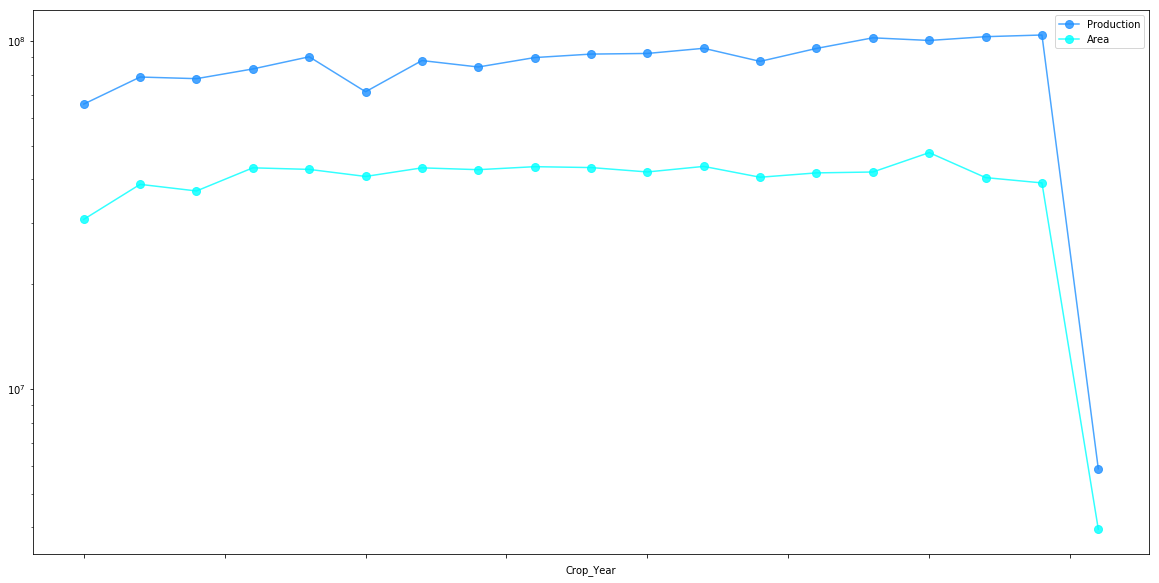

In [22]:
cultivation_data = crops_data[['Crop_Year', 'Crop', 'Area', 'Production']]
y='Rice'
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
    
print(cultivation_data)
print("Bar plot of the above data")
cultivation_data.dropna().plot(kind='bar', figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'])
print("Line plot of the above data")
cultivation_data.dropna().plot(figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'], linestyle='solid', marker='o', alpha=0.8, markersize=8)


**Visualization of area and production of a crop for a state**

           Production       Area
Crop_Year                       
1997        2255230.0  2525653.0
1998        3254833.0  2454122.0
1999        3860648.0  2645868.0
2000        3998443.0  2646177.0
2001        3854248.0  2536421.0
2002        3737802.0  2540680.0
2003        3880934.0  2529826.0
2004        3470750.0  2383731.0
2005        3552438.0  2420327.0
2006        2916014.0  2196559.0
2007        3318608.0  2323996.0
2008        4008435.0  2484126.0
2009        4408424.0  2497596.0
2010        5032529.0  2537455.0
2011        4715678.0  2545706.0
2012        5120052.0  2484728.0
2013        5193379.0  2503201.0
2014        5222645.0  2495297.0
Bar plot of the above data
Line plot of the above data


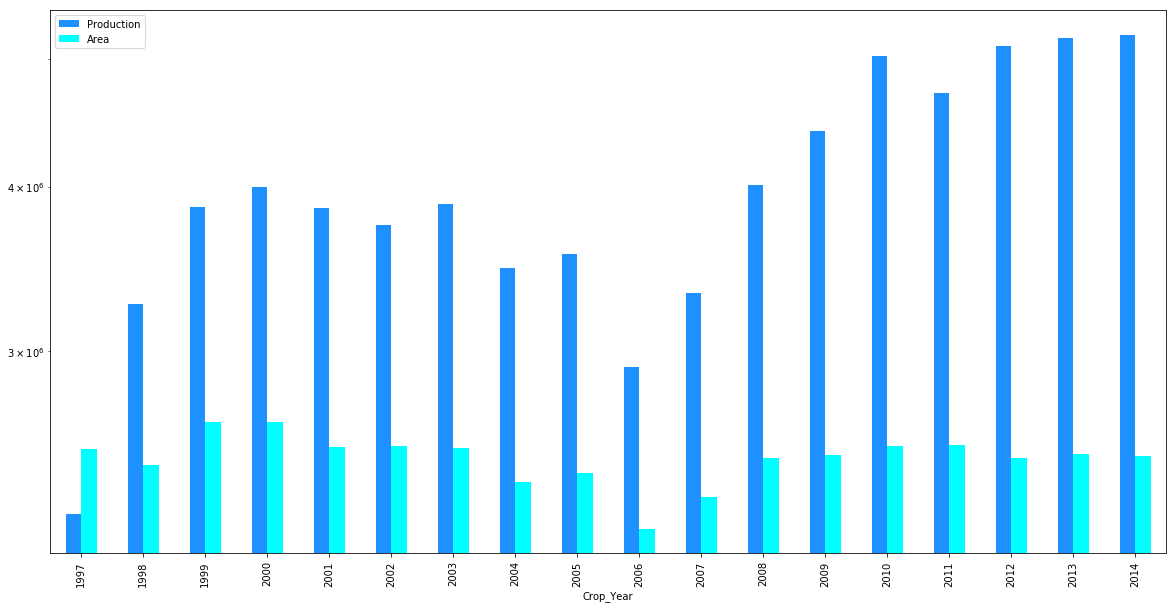

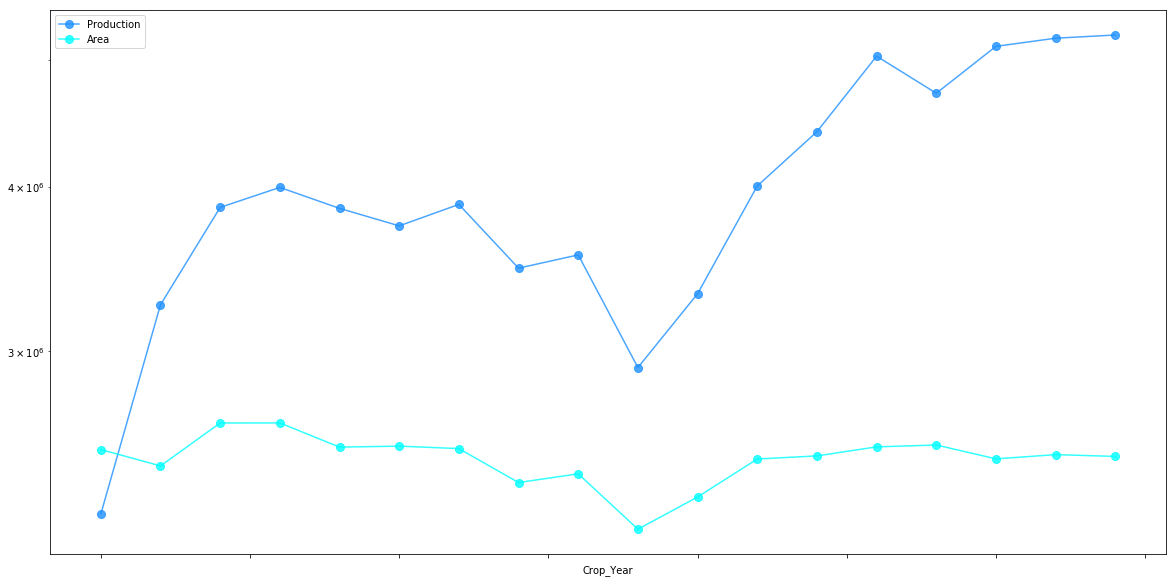

In [23]:
x='Assam'
y='Rice'
cultivation_data = crops_data[['State_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
    
cultivation_data=cultivation_data.groupby('State_Name').get_group(x)
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
    
print(cultivation_data)
print("Bar plot of the above data")
cultivation_data.dropna().plot(kind='bar', figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'])
print("Line plot of the above data")
cultivation_data.dropna().plot(figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'], linestyle='solid', marker='o', alpha=0.8, markersize=8)

**Visualization of area and production of a crop for a district**

           Production     Area
Crop_Year                     
1997         111879.0  60630.0
1998          82880.0  57264.0
1999         103525.0  59213.0
2000         112201.0  58729.0
2001         110649.0  63214.0
2002          54818.0  50275.0
2003          67205.0  51111.0
2004          91091.0  52351.0
2005         107219.0  56431.0
2006         102139.0  54196.0
2007         104886.0  53798.0
2008         126496.0  61277.0
2009          36498.0  18033.0
2010          38197.0  20449.0
2011          61250.0  24795.0
2012          68324.0  24874.0
2013          80474.0  28871.0
2014          73123.0  24683.0
Bar plot of the above data
Line plot of the above data


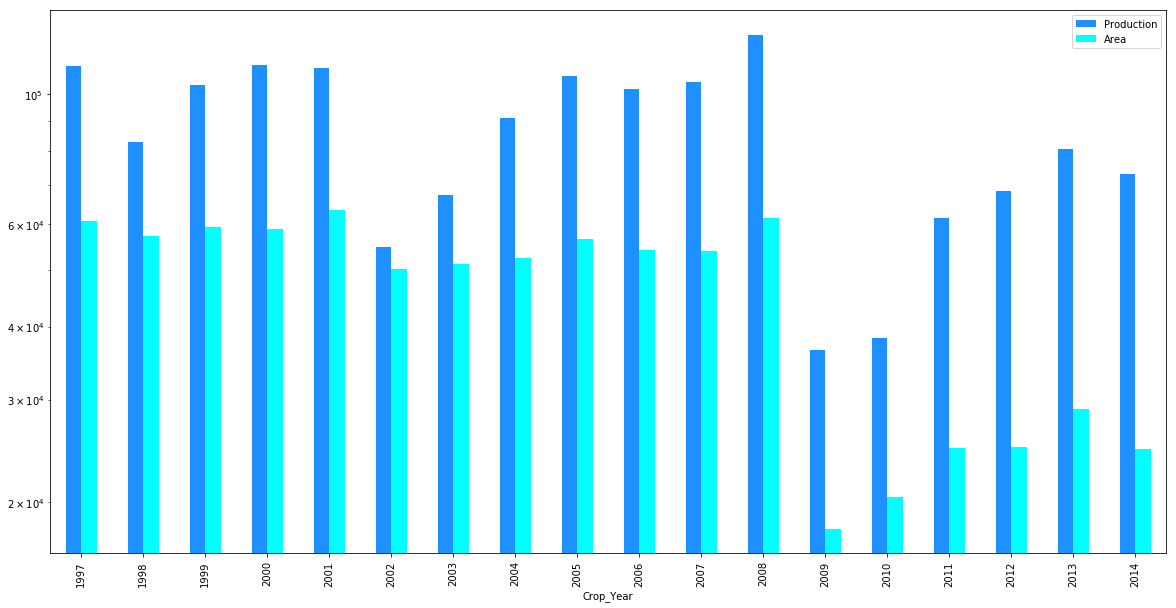

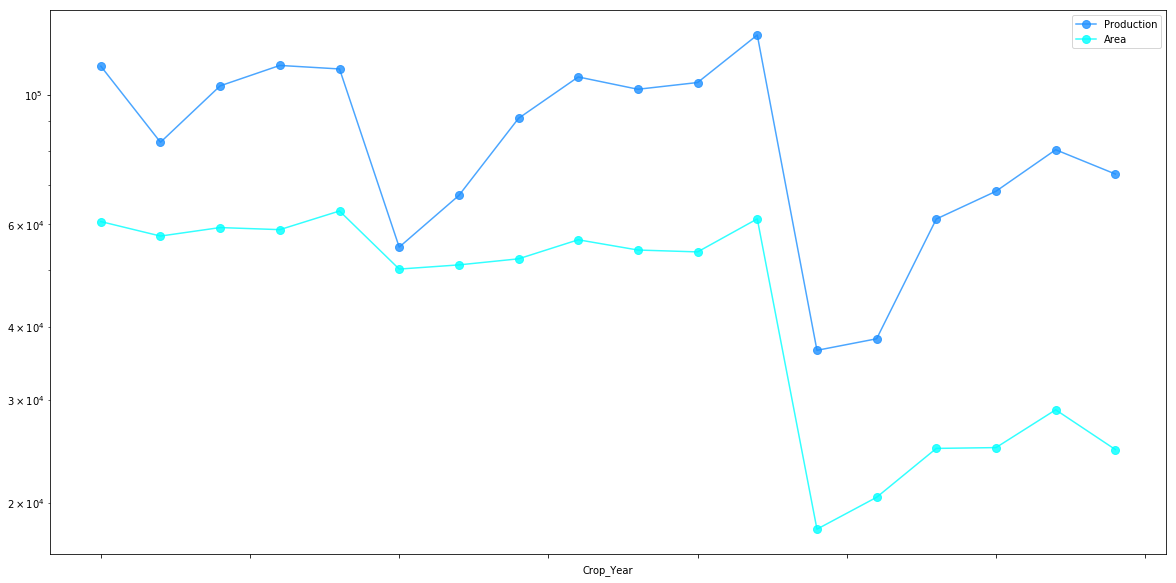

In [24]:
x='Uttar Pradesh'
z='ETAH'
y='Maize'
cultivation_data = crops_data[['State_Name','District_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
  
cultivation_data=cultivation_data.groupby('State_Name').get_group(x)
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('District_Name').get_group(z)
cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
  
print(cultivation_data)
print("Bar plot of the above data")
cultivation_data.dropna().plot(kind='bar', figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'])
print("Line plot of the above data")
cultivation_data.dropna().plot(figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'], linestyle='solid', marker='o', alpha=0.8, markersize=8)

**Visualization of area and production of a crop for a season**

           Production       Area
Crop_Year                       
1997       1581811.00  766599.00
1998       1474120.00  735384.00
1999       1384450.80  661382.00
2000       1418342.00  763969.00
2001       1417975.00  655001.00
2002       1378805.10  664523.00
2003       1305483.28  653910.82
2004       1172234.24  602355.57
2005       1182174.00  614635.00
2006       1245089.00  556516.00
2007       1196129.20  603529.00
2008       1669726.20  685198.00
2009       1209578.00  490359.00
2010       1690447.00  677806.00
2011        649362.00  248663.00
2012        709068.00  266497.00
2013        553455.30  217921.00
2014        372072.00  219863.00
2015           472.00     447.00
Bar plot of the above data
Line plot of the above data


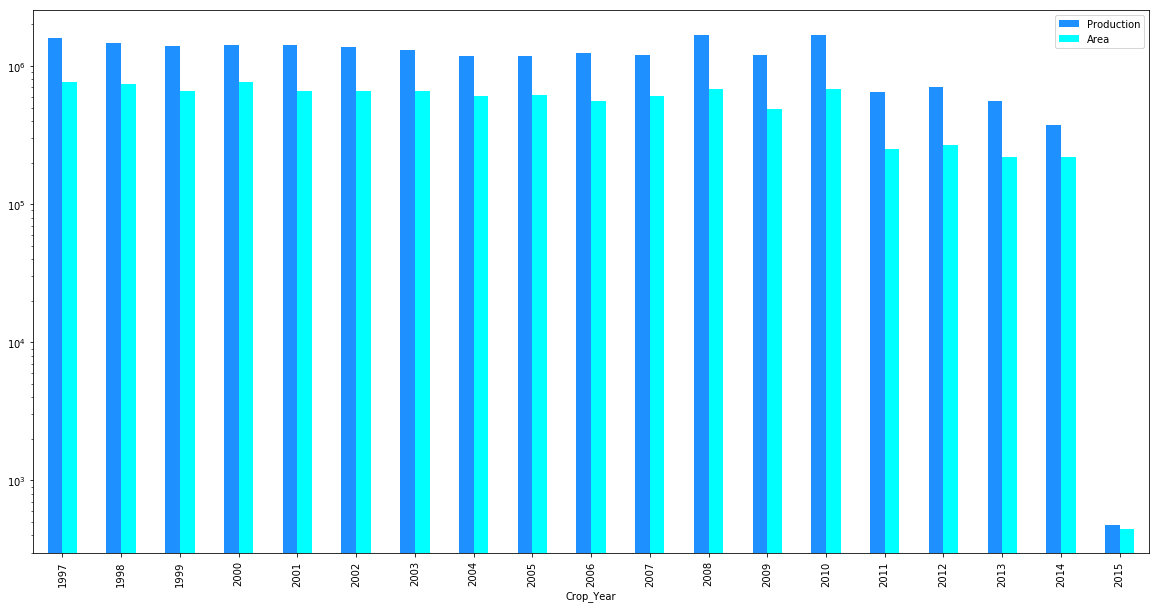

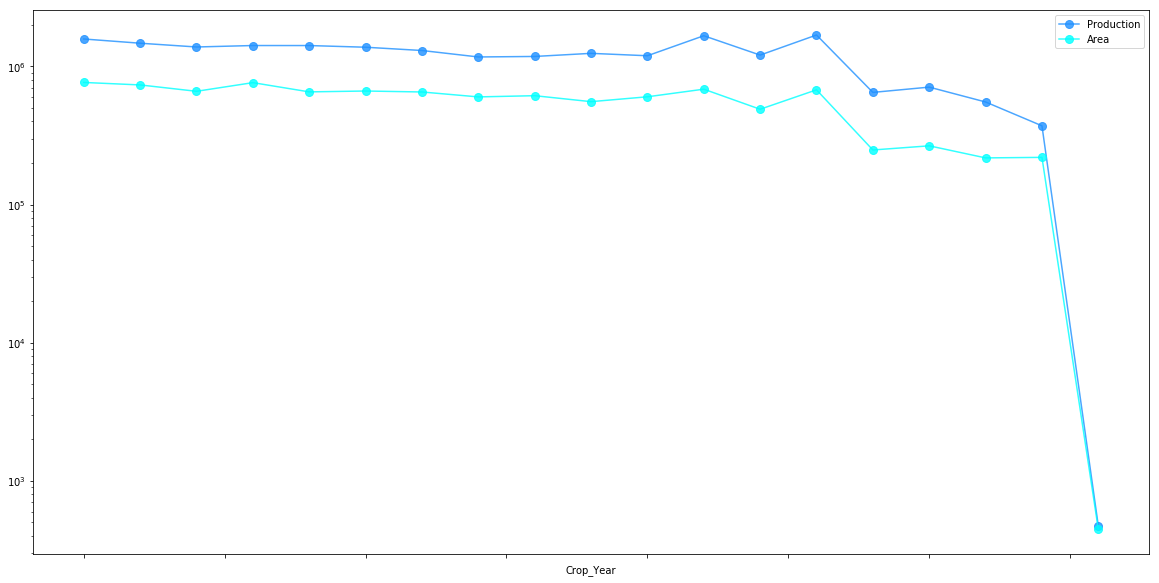

In [25]:
x='Rabi'
z='Barley'
cultivation_data=crops_data[['Season', 'Crop_Year', 'Crop', 'Area', 'Production']]
cultivation_data=cultivation_data.groupby('Season').get_group(x)
cultivation_data=cultivation_data.groupby('Crop').get_group(z)
cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
  
print(cultivation_data)
print("Bar plot of the above data")
cultivation_data.dropna().plot(kind='bar', figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'])
print("Line plot of the above data")
cultivation_data.dropna().plot(figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'], linestyle='solid', marker='o', alpha=0.8, markersize=8)

**Visualization and comparison of two states**

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



      Production_of_state1       ...        Area_of_state2
1997             3939416.0       ...                   NaN
1998             4292134.0       ...                   NaN
1999             4583515.0       ...                   NaN
2000             4437958.0       ...                   NaN
2001             4499130.0       ...                   NaN
2002             4040610.0       ...              57203.69
2003             3688941.0       ...              60269.70
2004             3263385.0       ...              57905.58
2005             2821120.0       ...              50326.23
2006             4155541.0       ...             124418.04
2007             4977463.0       ...              54845.72
2008             4413017.0       ...                   NaN
2009             4403841.0       ...                   NaN
2010             5094030.0       ...              49596.00
2011             6530955.0       ...                   NaN
2012             6174260.0       ...                   N

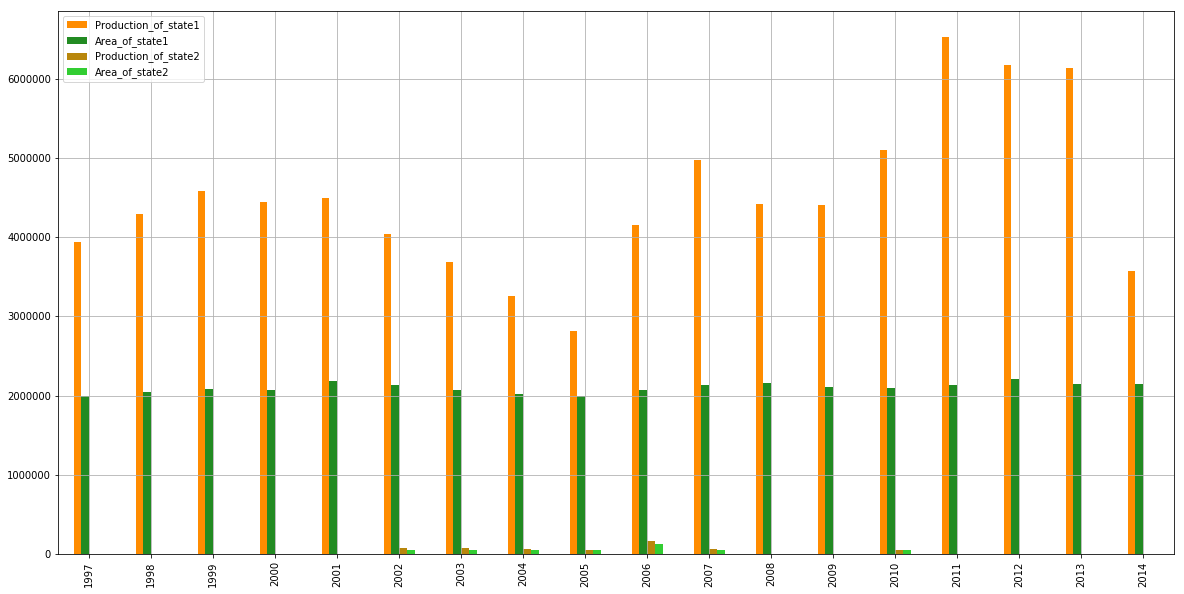

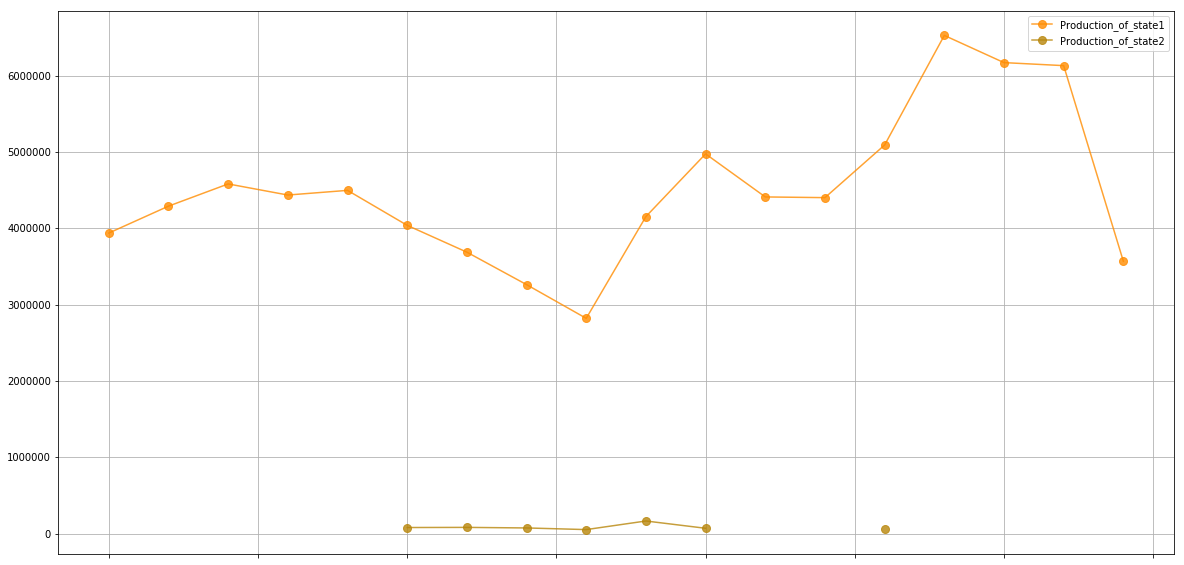

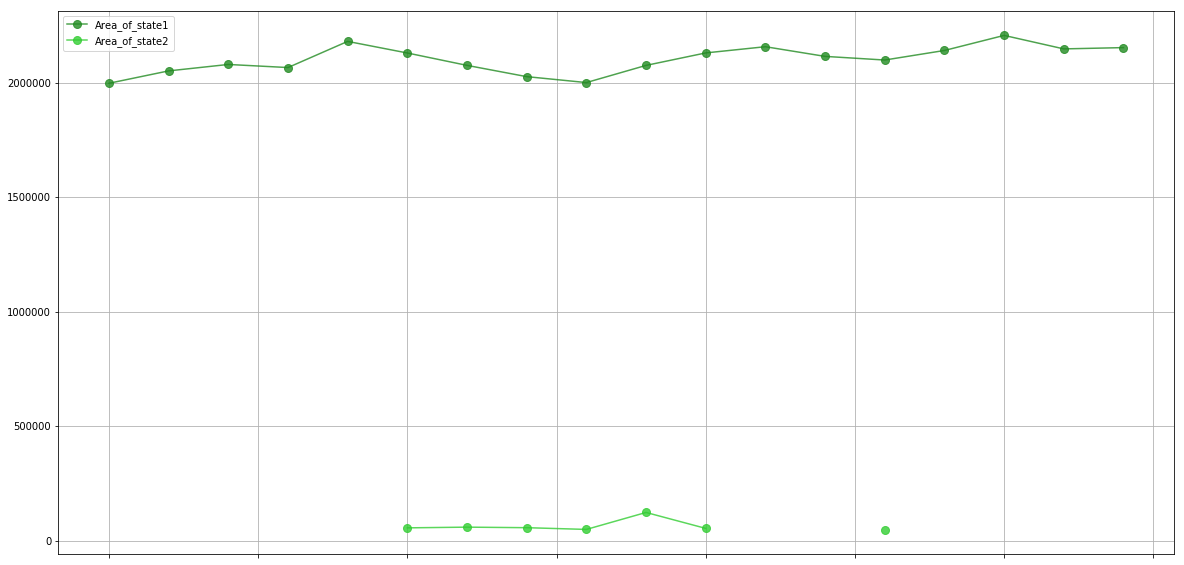

In [26]:
x='Bihar'
y='Wheat'
cultivation_data = crops_data[['State_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
    
cultivation_data=cultivation_data.groupby('State_Name').get_group(x)
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
    
a='Jharkhand'
b='Wheat'
cultivation_data1 = crops_data[['State_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
    
cultivation_data1=cultivation_data1.groupby('State_Name').get_group(a)
cultivation_data1=cultivation_data1.groupby('Crop').get_group(b)
cultivation_data1=cultivation_data1.groupby('Crop_Year')[['Production', 'Area']].sum()
    
cultivation_data.rename(columns={'Production':'Production_of_state1'}, inplace=True)
cultivation_data.rename(columns={'Area':'Area_of_state1'}, inplace=True)
cultivation_data1.rename(columns={'Production':'Production_of_state2'}, inplace=True)
cultivation_data1.rename(columns={'Area':'Area_of_state2'}, inplace=True)
df12=pd.concat([cultivation_data, cultivation_data1], axis=1)
    
print(df12)
ax=df12.plot(kind='bar', figsize=(20,10), color=['darkorange', 'forestgreen', 'darkgoldenrod', 'limegreen'], grid=True)
print("COMPARISON OF PRODUCTION")
ax=df12.plot(y=['Production_of_state1', 'Production_of_state2'], figsize=(20,10), color=['darkorange', 'darkgoldenrod'], grid=True, linestyle='solid', marker='o', alpha=0.8, markersize=8)
print("COMPARISON OF AREA")
ax=df12.plot(y=['Area_of_state1', 'Area_of_state2'], figsize=(20,10), color=['forestgreen', 'limegreen'], grid=True, linestyle='solid', marker='o', alpha=0.8, markersize=8)

**Visualization and comparison of two districts**

           Production_of_district1        ...          Area_of_district2
Crop_Year                                 ...                           
1997                      465940.0        ...                   182084.0
1998                      540840.0        ...                   189213.0
1999                      474091.0        ...                   189363.0
2000                      366550.0        ...                   191836.0
2001                      299823.0        ...                   215963.0
2002                      239781.0        ...                   224036.0
2003                      268581.0        ...                   219325.0
2004                      207532.0        ...                   211097.0
2005                      288747.0        ...                   231170.0
2006                      243802.0        ...                   227118.0
2007                      284573.0        ...                   224650.0
2008                      242726.0        ...      

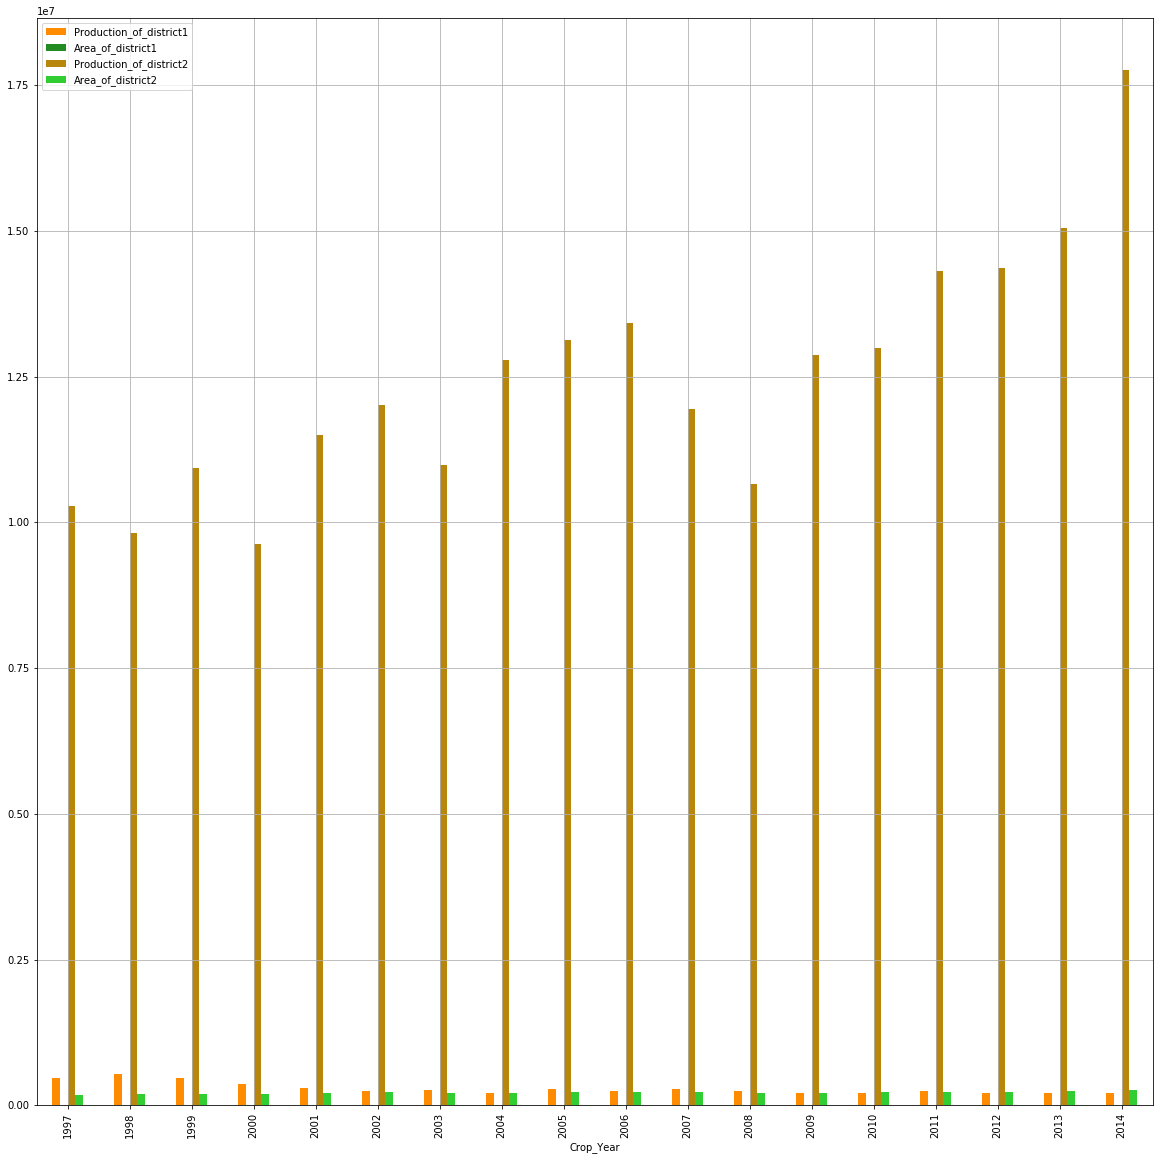

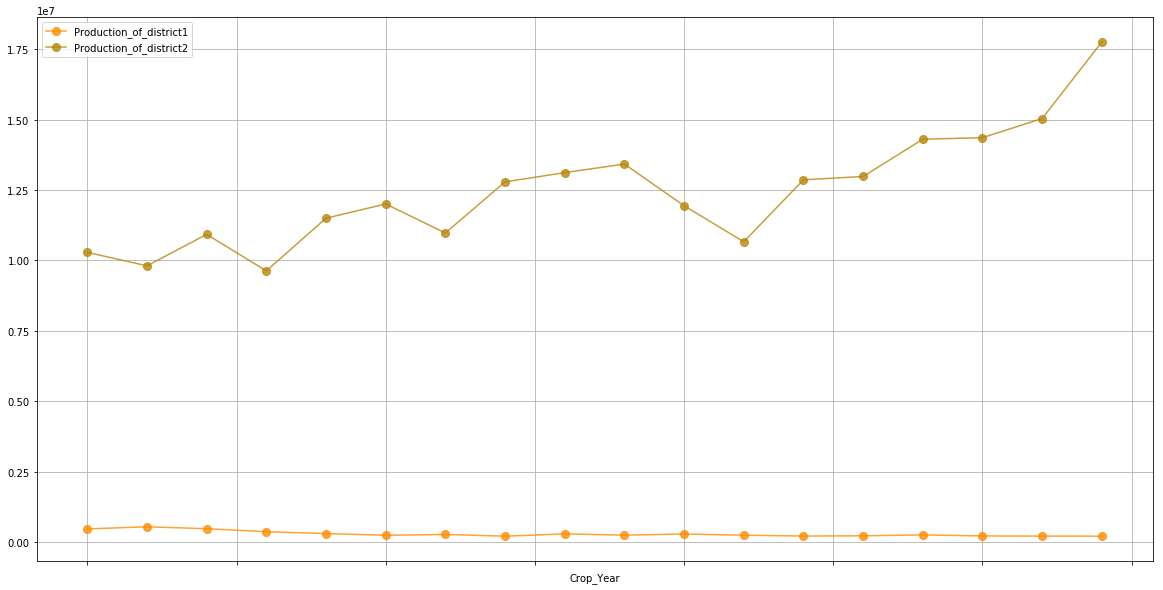

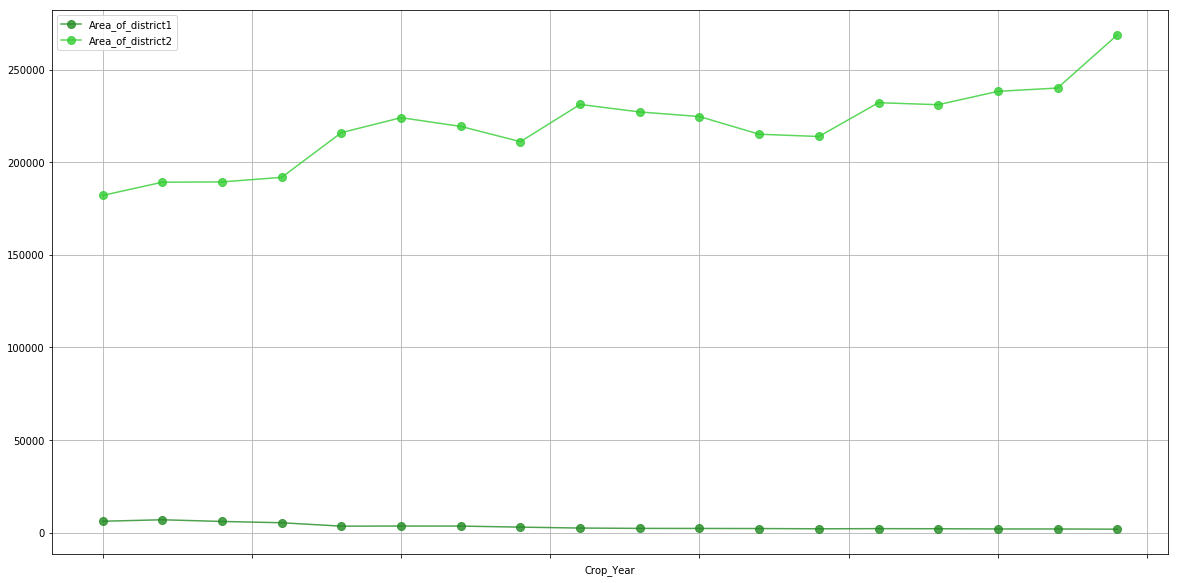

In [27]:
x='West Bengal'
z='MALDAH'
y='Sugarcane'
cultivation_data = crops_data[['State_Name', 'District_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
  
cultivation_data=cultivation_data.groupby('State_Name').get_group(x)
cultivation_data=cultivation_data.groupby('District_Name').get_group(z)
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
  
a='Uttar Pradesh'
c='KHERI'
b='Sugarcane'
cultivation_data1 = crops_data[['State_Name', 'District_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
  
cultivation_data1=cultivation_data1.groupby('State_Name').get_group(a)
cultivation_data1=cultivation_data1.groupby('District_Name').get_group(c)
cultivation_data1=cultivation_data1.groupby('Crop').get_group(b)
cultivation_data1=cultivation_data1.groupby('Crop_Year')[['Production', 'Area']].sum()
  
cultivation_data.rename(columns={'Production':'Production_of_district1'}, inplace=True)
cultivation_data.rename(columns={'Area':'Area_of_district1'}, inplace=True)
cultivation_data1.rename(columns={'Production':'Production_of_district2'}, inplace=True)
cultivation_data1.rename(columns={'Area':'Area_of_district2'}, inplace=True)
df12=pd.concat([cultivation_data, cultivation_data1], axis=1)

print(df12)
ax=df12.plot(kind='bar', figsize=(20,20), color=['darkorange', 'forestgreen', 'darkgoldenrod', 'limegreen'], grid=True)
print("COMPARISON OF PRODUCTION")
ax=df12.plot(y=['Production_of_district1', 'Production_of_district2'], figsize=(20,10), color=['darkorange', 'darkgoldenrod'], grid=True, linestyle='solid', marker='o', alpha=0.8, markersize=8)
print("COMPARISON OF AREA")
ax=df12.plot(y=['Area_of_district1', 'Area_of_district2'], figsize=(20,10), color=['forestgreen', 'limegreen'], grid=True, linestyle='solid', marker='o', alpha=0.8, markersize=8)

**Top ten states with highest production of a crop**

                             Production       Area
State_Name                                        
West Bengal                  13389610.0  4944146.0
Uttar Pradesh                11992299.0  5657070.0
Punjab                       10837000.0  2831000.0
Andhra Pradesh                7883078.0  2772377.0
Odisha                        6824000.0  4226000.0
Chhattisgarh                  6637737.0  3937796.0
Telangana                     6536235.0  1978932.0
Tamil Nadu                    5792415.0  1905726.0
Assam                         5032529.0  2537455.0
Karnataka                     4473972.0  1539066.0
Haryana                       3465000.0  1243281.0
Bihar                         3112618.0  2845368.0
Maharashtra                   2624900.0  1486200.0
Madhya Pradesh                1766596.0  1573535.0
Gujarat                       1665800.0   808100.0
Tripura                        702473.0   264558.0
Uttarakhand                    545586.0   285693.0
Kerala                         

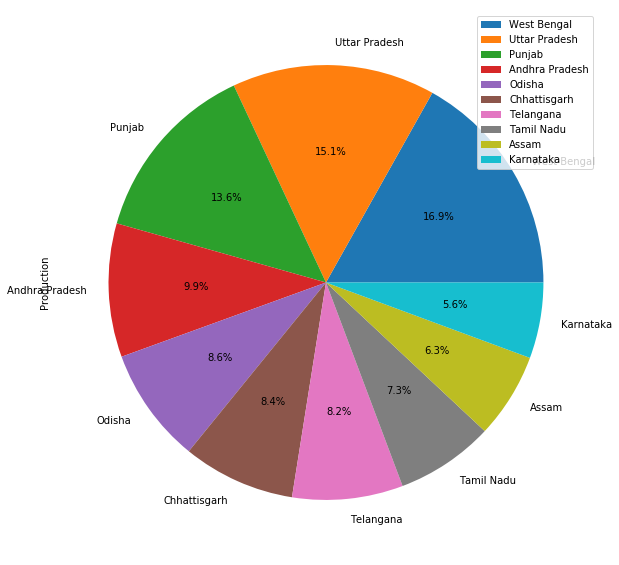

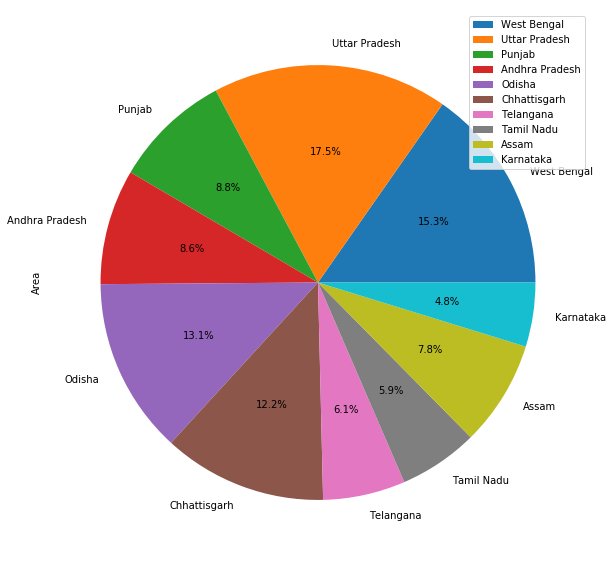

In [28]:
x='2010'
y='Rice'
  
dd1=crops_data[['State_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]

dd1=dd1.groupby('Crop_Year').get_group(x)
dd1=dd1.groupby('Crop').get_group(y)
dd1=dd1.groupby('State_Name')[['Production', 'Area']].sum()
dd1=dd1.sort_values(by='Production', ascending=False)
print(dd1)
print("Pie chart plot of the data for top ten states")
dd1[:10].plot(kind='pie', y='Production', figsize=(10,10), autopct='%1.1f%%')
dd1[:10].plot(kind='pie', y='Area', figsize=(10,10), autopct='%1.1f%%')
print('Joint plot showing the about the ratio')

**Top ten distrits of a state with highest production of a crop**

               Production    Area
District_Name                    
BARPETA            7634.0  6924.0
BONGAIGAON         6680.0  5125.0
MARIGAON           6497.0  5312.0
KOKRAJHAR          4433.0  2640.0
DHUBRI             4200.0  3355.0
GOALPARA           3375.0  2250.0
NAGAON             3234.0  3172.0
DARRANG            2455.0  2082.0
KAMRUP             1935.0  1903.0
UDALGURI           1882.0  1920.0
KARBI ANGLONG      1811.0  1233.0
SONITPUR           1152.0  1122.0
CHIRANG             990.0   966.0
BAKSA               576.0   380.0
NALBARI             533.0   570.0
GOLAGHAT            511.0   422.0
DHEMAJI             203.0   397.0
KAMRUP METRO        170.0   141.0
CACHAR               85.0    70.0
LAKHIMPUR            83.0    79.0
TINSUKIA             41.0    34.0
DIBRUGARH            31.0    26.0
DIMA HASAO           30.0    25.0
JORHAT               22.0    22.0
SIVASAGAR            22.0    18.0
KARIMGANJ             7.0     6.0
Pie chart plot of the data for top ten states


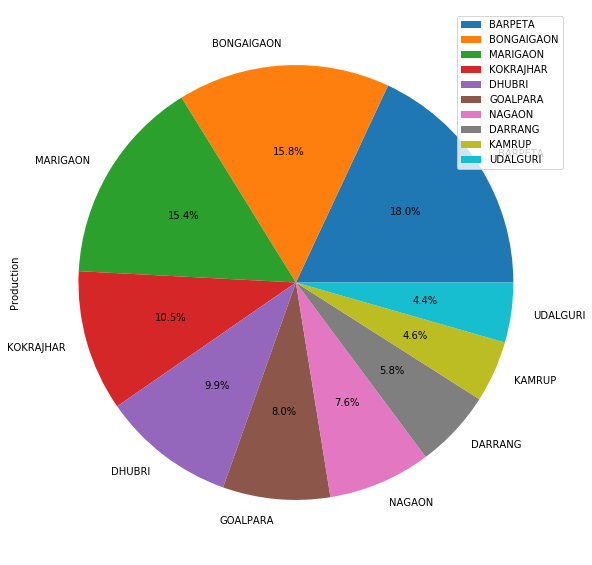

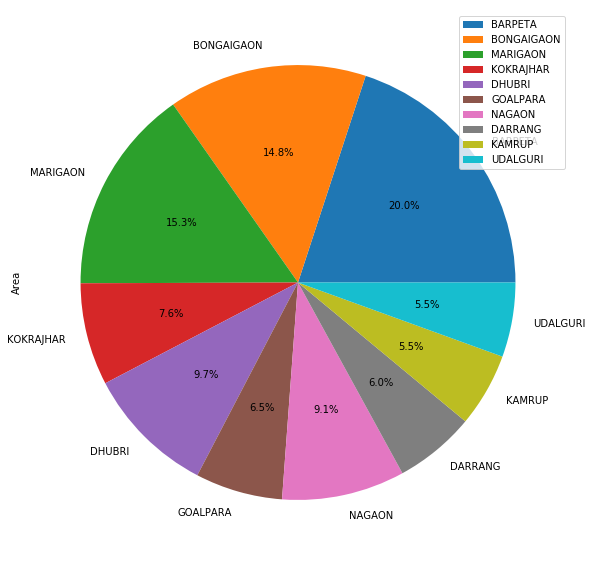

In [29]:
x='2011'
y='Wheat'
z='Assam'
  
dd1=crops_data[['State_Name', 'District_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]

dd1=dd1.groupby('Crop_Year').get_group(x)
dd1=dd1.groupby('Crop').get_group(y)
dd1=dd1.groupby('State_Name').get_group(z)
dd1=dd1.groupby('District_Name')[['Production', 'Area']].sum()
dd1=dd1.sort_values(by='Production', ascending=False)
print(dd1)
print("Pie chart plot of the data for top ten states")
dd1[:10].plot(kind='pie', y='Production', figsize=(10,10), autopct='%1.1f%%')
dd1[:10].plot(kind='pie', y='Area', figsize=(10,10), autopct='%1.1f%%')

**PREDICTION**

**list of models**

In [30]:
models = []
models.append(LinearRegression())
models.append(DecisionTreeRegressor())
models.append(KNeighborsRegressor(n_neighbors = 2))
models.append(SVR(gamma='auto'))
names=['LR', 'DTR', 'KNR', 'SVR']

**For a specific crop in India**

Explained variance score for different models
LR :  0.8153763075054613
DTR :  0.7605545496315183
KNR :  0.859924679031808
SVR :  0.0
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')
Production will be 2943530.0


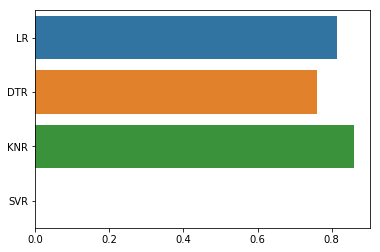

In [38]:
cultivation_data = crops_data[['Crop_Year', 'Crop', 'Area', 'Production']]
y='Banana'
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
predofprod=list()
X = cultivation_data['Area'].values.reshape(-1, 1)
Y = cultivation_data['Production'].ravel()
validation_size = 0.30
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size)
varlist=list()
for model in models:
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    #print(explained_variance_score(y_test, y_pred))
    r1=explained_variance_score(y_test, y_pred)
    varlist.append(r1)
print("Explained variance score for different models")
print('LR : ', varlist[0])
print('DTR : ', varlist[1])
print('KNR : ', varlist[2])
print('SVR : ', varlist[3])
sns.barplot(x=varlist, y=names)
best_model_var=varlist[0]
best_model=models[0]
for i in range(len(names)):
    if varlist[i]>best_model_var:
        best_model_var=varlist[i]
        best_model=models[i]
print(best_model)

best_model.fit(X_train, y_train)
z=12345
predofprod.append(z)
predofprod=np.reshape(predofprod, (1,-1))
prod=best_model.predict(predofprod)
print("Production will be",prod[0])

**For a specific crop in a specific state**

Explained variance score for different models
LR :  -0.7701490868030589
DTR :  -2.4527153287540804
KNR :  0.572816296728641
SVR :  0.0
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')
Production will be 437263.5


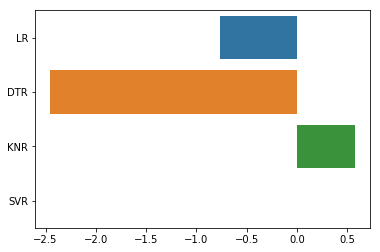

In [36]:
x='Assam'
y='Potato'
cultivation_data = crops_data[['State_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
predofprod=list()  
cultivation_data=cultivation_data.groupby('State_Name').get_group(x)
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
X = cultivation_data['Area'].values.reshape(-1, 1)
Y = cultivation_data['Production'].ravel()
validation_size = 0.30
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size)
varlist=list()
for model in models:
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    #print(explained_variance_score(y_test, y_pred))
    r1=explained_variance_score(y_test, y_pred)
    varlist.append(r1)
print("Explained variance score for different models")
print('LR : ', varlist[0])
print('DTR : ', varlist[1])
print('KNR : ', varlist[2])
print('SVR : ', varlist[3])
sns.barplot(x=varlist, y=names)
best_model_var=varlist[0]
best_model=models[0]
for i in range(len(names)):
    if varlist[i]>best_model_var:
        best_model_var=varlist[i]
        best_model=models[i]
print(best_model)

best_model.fit(X_train, y_train)
z=12345
predofprod.append(z)
predofprod=np.reshape(predofprod, (1,-1))
prod=best_model.predict(predofprod)
print("Production will be",prod[0])

**For a specific crop in a specific district**

Explained variance score for different models
LR :  0.02701711554260966
DTR :  -0.010137912315734354
KNR :  -0.2191078993478508
SVR :  0.0
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Production will be 3356840627.023782


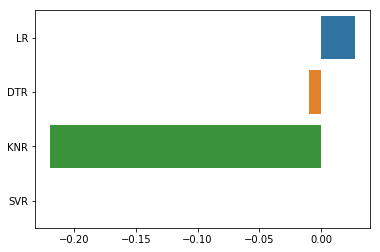

In [35]:
x='Kerala'
w='MALAPPURAM'
y='Coconut '
cultivation_data = crops_data[['State_Name', 'District_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
predofprod=list()  
cultivation_data=cultivation_data.groupby('State_Name').get_group(x)
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('District_Name').get_group(w)
cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
X = cultivation_data['Area'].values.reshape(-1, 1)
Y = cultivation_data['Production'].ravel()
validation_size = 0.30
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size)
varlist=list()
for model in models:
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    #print(explained_variance_score(y_test, y_pred))
    r1=explained_variance_score(y_test, y_pred)
    varlist.append(r1)
print("Explained variance score for different models")
print('LR : ', varlist[0])
print('DTR : ', varlist[1])
print('KNR : ', varlist[2])
print('SVR : ', varlist[3])
sns.barplot(x=varlist, y=names)
best_model_var=varlist[0]
best_model=models[0]
for i in range(len(names)):
    if varlist[i]>best_model_var:
        best_model_var=varlist[i]
        best_model=models[i]
print(best_model)

best_model.fit(X_train, y_train)
z=12345
predofprod.append(z)
predofprod=np.reshape(predofprod, (1,-1))
prod=best_model.predict(predofprod)
print("Production will be",prod[0])

**For a specific crop for a season**

Explained variance score for different models
LR :  0.04171836735759149
DTR :  0.5226057441967793
KNR :  0.5125815806466937
SVR :  1.1102230246251565e-16
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Production will be 5596456.0


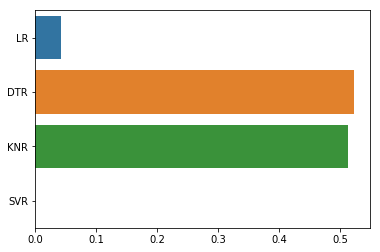

In [34]:
x='Summer'
y='Rice'
cultivation_data=crops_data[['Season', 'Crop_Year', 'Crop', 'Area', 'Production']]
cultivation_data=cultivation_data.groupby('Season').get_group(x)
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
predofprod=list()
X = cultivation_data['Area'].values.reshape(-1, 1)
Y = cultivation_data['Production'].ravel()
validation_size = 0.30
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size)
varlist=list()
for model in models:
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    #print(explained_variance_score(y_test, y_pred))
    r1=explained_variance_score(y_test, y_pred)
    varlist.append(r1)
print("Explained variance score for different models")
print('LR : ', varlist[0])
print('DTR : ', varlist[1])
print('KNR : ', varlist[2])
print('SVR : ', varlist[3])
sns.barplot(x=varlist, y=names)  
best_model_var=varlist[0]
best_model=models[0]
for i in range(len(names)):
    if varlist[i]>best_model_var:
        best_model_var=varlist[i]
        best_model=models[i]
print(best_model)

best_model.fit(X_train, y_train)
z=12345
predofprod=list()
predofprod.append(z)
predofprod=np.reshape(predofprod, (1,-1))
prod=best_model.predict(predofprod)
print("Production will be",prod[0])